# Face Recognition
## Task 1
___

In [1]:
import time
import os
import matplotlib.pyplot as plt
import cv2
from mtcnn import MTCNN


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:

directory = "fr-imgs-input/"
output = "fr-imgs-output/"

detector = MTCNN()

for fname_img in sorted(os.listdir(directory)):
    timing = time.time()
    image = cv2.cvtColor(cv2.imread(directory + fname_img), cv2.COLOR_BGR2RGB)
    results = detector.detect_faces(image)
    timing = time.time() - timing

    fname_out = output+fname_img.split(".")[0] + "_faces.jpg"

    print("========================")
    print(f"{timing=}")
    print(f"Number of faces found: {len(results)}")

    for result in results:
        # 'result' is an array with all the bounding boxes detected.
        print(f"{result['confidence']}")
        bounding_box = result['box']
        keypoints = result['keypoints']

        cv2.rectangle(
            image,
            (bounding_box[0], bounding_box[1]),
            (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
            (255, 0, 0),
            2)

        cv2.circle(image,(keypoints['left_eye']), 2, (0, 155, 255), 2)
        cv2.circle(image,(keypoints['right_eye']), 2, (0, 155, 255), 2)
        cv2.circle(image,(keypoints['nose']), 2, (0, 155, 255), 2)
        cv2.circle(image,(keypoints['mouth_left']), 2, (0, 155, 255), 2)
        cv2.circle(image,(keypoints['mouth_right']), 2, (0, 155, 255), 2)

    print("========================")
    cv2.imwrite(fname_out, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))


timing=3.568981170654297
Number of faces found: 4
0.9998602867126465
0.9547123908996582
0.8946696519851685
0.7226129770278931
timing=1.9539330005645752
Number of faces found: 1
0.9999896287918091
timing=1.231929063796997
Number of faces found: 1
1.0
timing=0.8952932357788086
Number of faces found: 1
0.9997459053993225


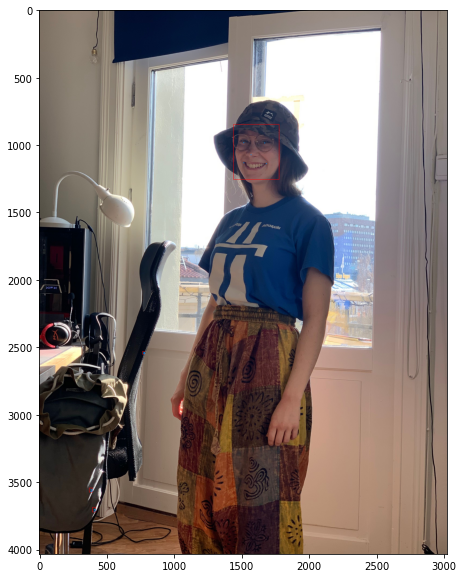

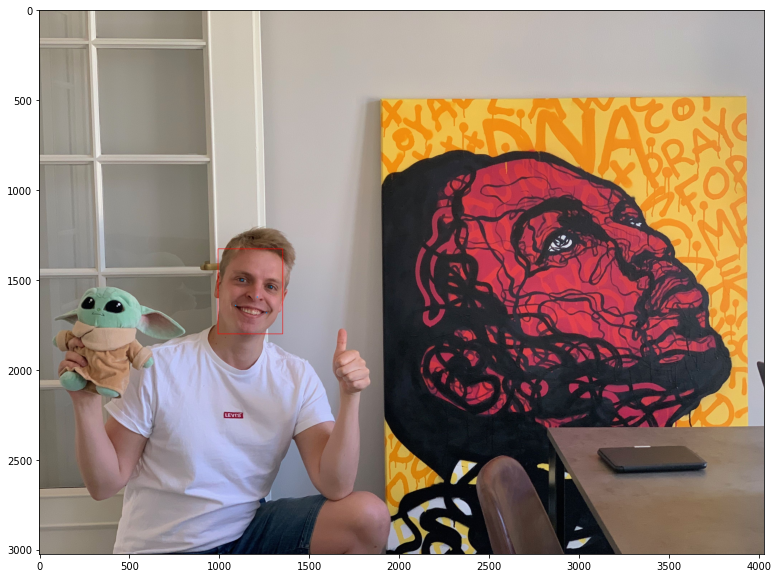

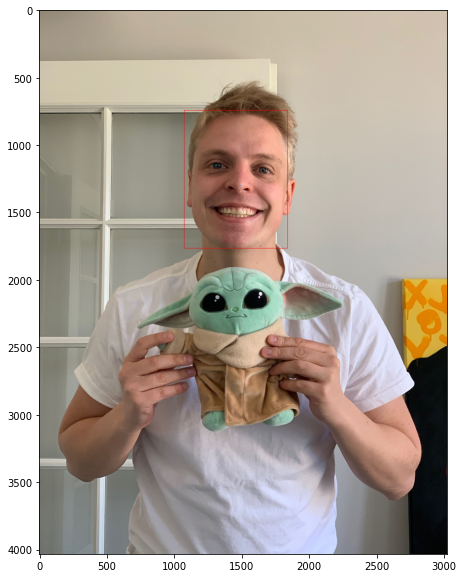

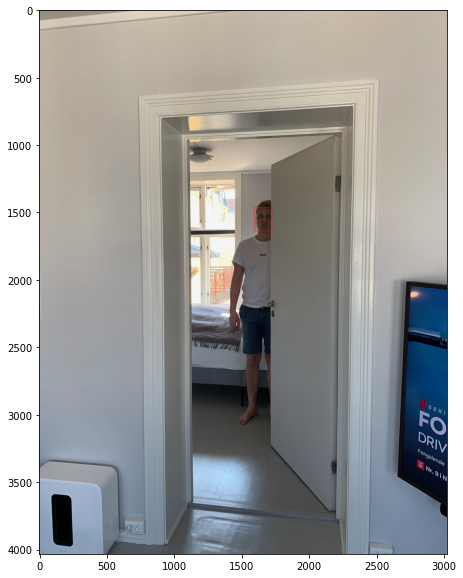

In [20]:
for fname_img in sorted(os.listdir(output)):
    image = cv2.imread(output+fname_img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.rcParams["figure.figsize"] = (20,10)

    plt.imshow(image)
    plt.show()